In [40]:
# This dataset is take from Tianchi Competiton, it is a public dataset 

In [41]:
# Import Library 
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
import warnings
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)
%matplotlib inline

In [42]:
# Description of 7 fileds follow:
# 1. Order ID: The ID of order
# 2. Total_Price: the total amount of the order
# 3. Actual_Pay: total amount-payment amount (in the case of payment). The amount is 0 (in case of unpaid)
# 4. Address: Receiving address
# 5. Odert_Time: The time of the order is created 
# 6. Pay_Time: The time of payment
# 7. Refund: the amount applied for after payment. If no payment has been made, the refund amount is 0

In [43]:
# Read the file
df = pd.read_excel(r'C:\Users\ryanfzhang\Desktop\test_data.xlsx')

In [44]:
df.head()

,Order ID,Total_Price,Actual_Pay,Address,Order_Time,Pay_time,Refund
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     28010 non-null  int64         
 1   Total_Price  28010 non-null  float64       
 2   Actual_Pay   28010 non-null  float64       
 3   Address      28010 non-null  object        
 4   Order_Time   28010 non-null  datetime64[ns]
 5   Pay_time     24087 non-null  datetime64[ns]
 6   Refund       28010 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [46]:
df.describe()

,Order ID,Total_Price,Actual_Pay,Refund
count,28010.000000,28010.000000,28010.000000,28010.000000
mean,14005.500000,106.953253,67.921712,20.433271
std,8085.934856,1136.587094,151.493434,71.501963
min,1.000000,1.000000,0.000000,0.000000
25%,7003.250000,38.000000,0.000000,0.000000
50%,14005.500000,75.000000,45.000000,0.000000
75%,21007.750000,119.000000,101.000000,0.000000
max,28010.000000,188320.000000,16065.000000,3800.000000


# Data Preparation


In [47]:
# Checking the missing value 
df.isnull().sum()
# Only Pay_time has missing value, it means that the customer did not pay at that time, so it is not nesccary to do anything

Order ID          0
Total_Price       0
Actual_Pay        0
Address           0
Order_Time        0
Pay_time       3923
Refund            0
dtype: int64

In [48]:
# Checking the duplicates
df.duplicated().sum()

0

In [49]:
# According to the order creation time, add a new column in the format of month and day
df['Order_Time_M_D']=df["Order_Time"].apply(lambda x: x.strftime("%m-%d"))
df.head()

,Order ID,Total_Price,Actual_Pay,Address,Order_Time,Pay_time,Refund,Order_Time_M_D
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02-21
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,02-20
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0,02-20
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,02-20
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,02-20


# EDA


In [50]:
# Line Chart of the total price of actual payment
df_true_money = df.groupby('Order_Time_M_D')['Actual_Pay'].sum()

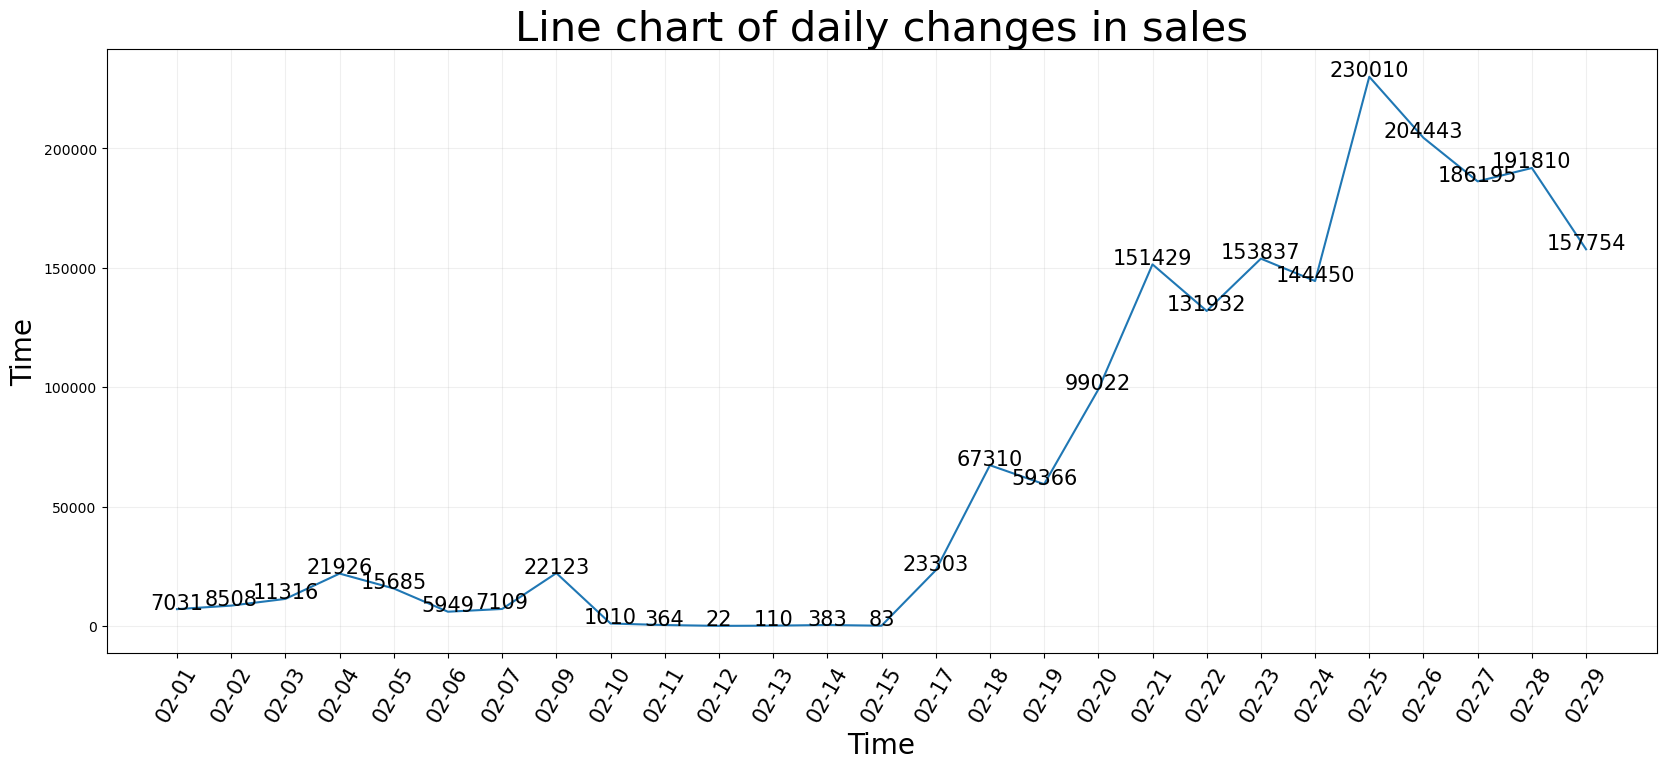

In [51]:
x1 = df_true_money.index
y1 = df_true_money.values
picture_size = plt.figure(figsize=(20,8), dpi = 100)
plt.xticks(range(len(x1)),x1,rotation = 60, size =15)
plt.xlabel('Time',size = 20)
plt.ylabel('Time',size = 20)
plt.title('Line chart of daily changes in sales',size = 30)
for i,j in zip(x1,y1):
    plt.text(i,j+70,'%s'%int(j),ha='center',size=15) #The line graph will mark each coordinate point with a value
plt.plot(x1,y1)
plt.grid(alpha = 0.2)
plt.show()

# As can be seen from the picture:
# 1. The overall sales are rising
# 2. The peak value appeared on February 25th with a value of 230010.2
# 3. In the first half of the month, sales were small but rose rapidly in the second half of the month.
# 4. The trend of the same order is roughly the same, and the value from February 10th to February 15th is relatively small.

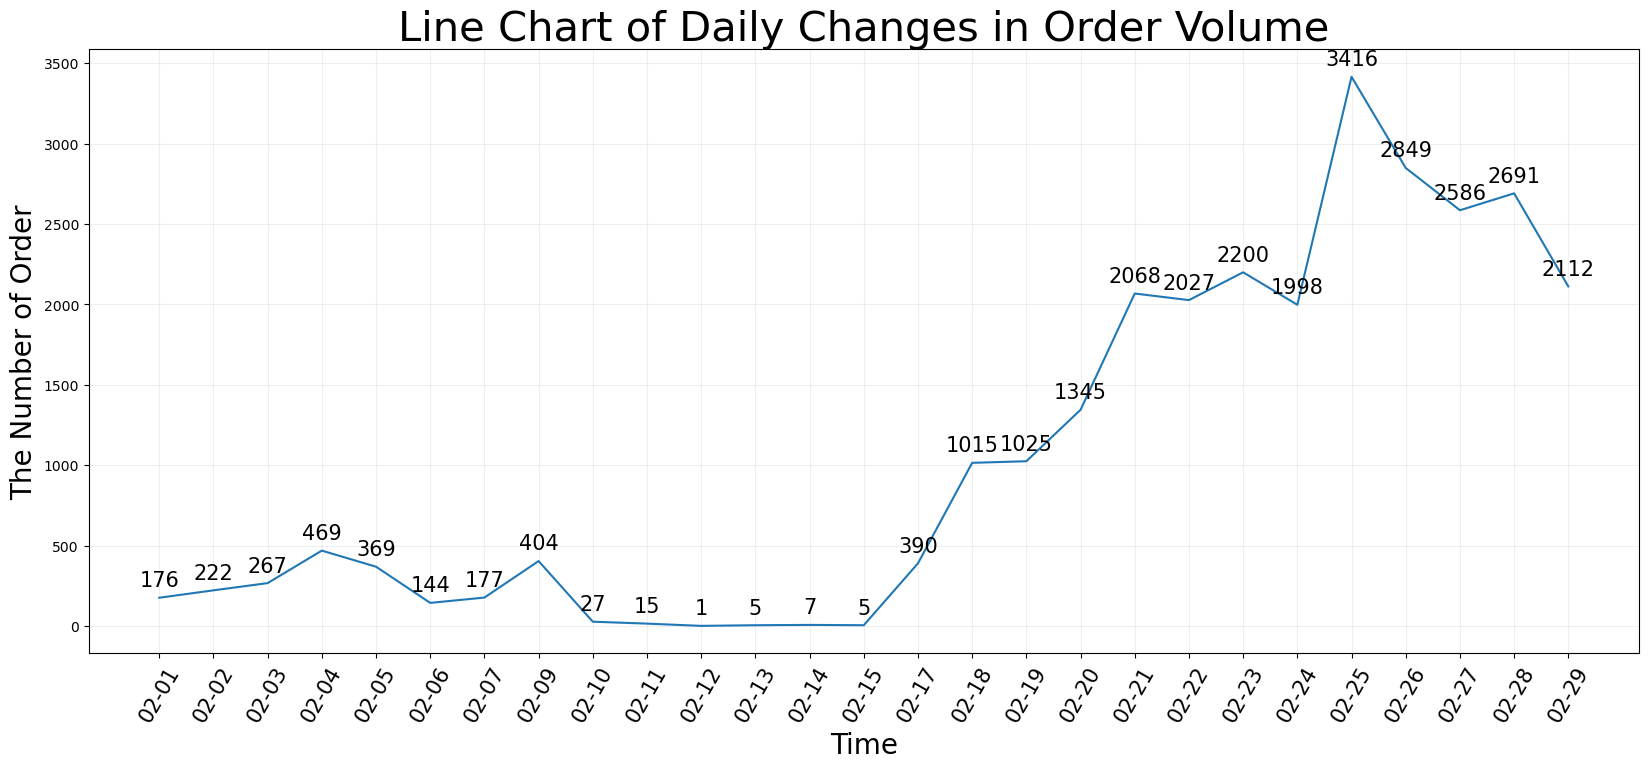

In [52]:
#  Line Chart of the number of order
df_order_num=df.groupby('Order_Time_M_D')['Order ID'].count()
x1=df_order_num.index
y1=df_order_num.values
picture_size=plt.figure(figsize=(20,8),dpi=100)
plt.xticks(range(len(x1)),x1,rotation=60,size=15)
plt.xlabel('Time',size=20)
plt.ylabel('The Number of Order',size=20)
plt.title('Line Chart of Daily Changes in Order Volume',size=30)
for i,j in zip(x1,y1):
    plt.text(i,j+70,'%s'%j,ha='center',size=15)
plt.plot(x1,y1)
plt.grid(alpha=0.2)
plt.show()

# As can be seen from the picture:
# 1. The sales order volume reached its peak on February 25, at 3416
# 2. The order volume in the first half of the month was sluggish, especially from February 10th to February 15th
# 3. The overall order volume in the second half of the month shows an upward trend

In [53]:
# Create the Conversion Funnel
# 1.The total number of order
df_order = df['Order ID'].count()
df_order

28010

In [54]:
# 2.How many paid
df_order_pay=df[df['Pay_time'].notnull()]['Pay_time'].count()
df_order_pay


24087

In [55]:
# Number of orders received
df_order_dpay=df[df['Actual_Pay']!=0.0]['Actual_Pay'].count()
df_order_dpay

18955

In [56]:
# How many fully paid 
df_order_allpay=df[df['Total_Price']==df['Actual_Pay']]['Order ID'].count()
df_order_allpay

18441

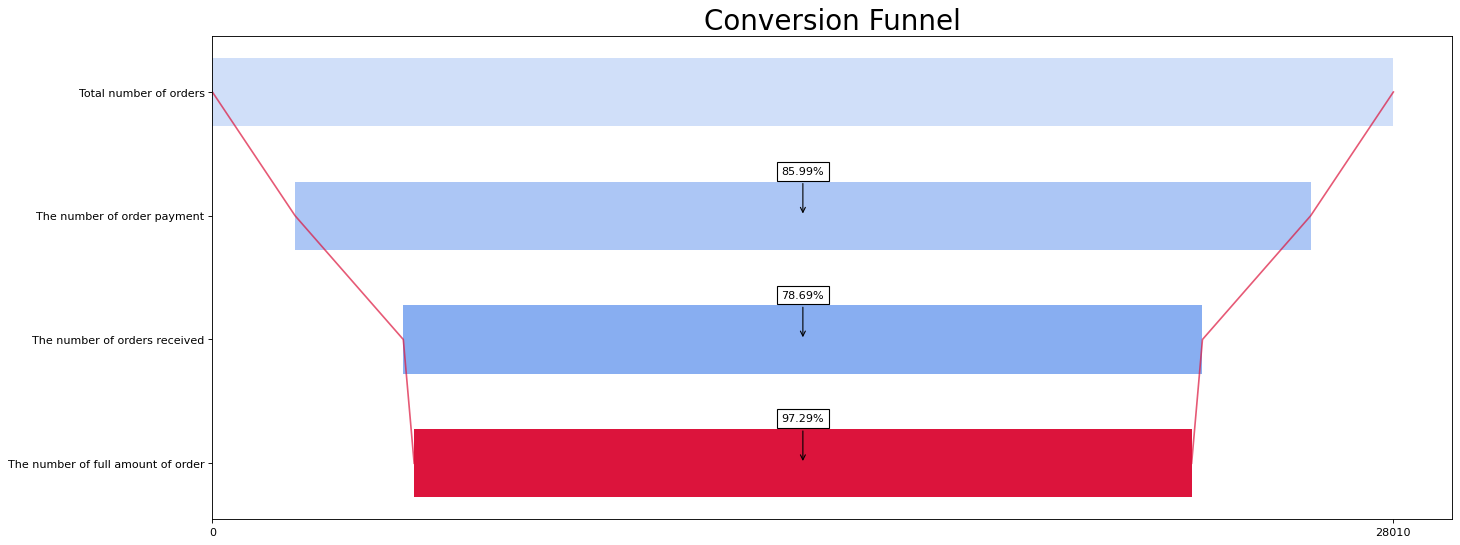

In [57]:
picture_size=plt.figure(figsize=(20,8),dpi=80)
width=0.55
x0=np.array([28010,24087,18955,18441])
labels=['Total number of orders','The number of order payment','The number of orders received','The number of full amount of order']
N=x0.size
max_value = x0.max()
x = x0*np.eye(N)
blank= np.array((x0.max()-x0)/2) 
y = np.arange(N-1,-1,-1) 
ax = picture_size.add_subplot(111)

zeros = np.zeros(N)
alpha_step = (1-0.3)/(N-1)
for i in range(N-1):
    ax.barh(y,x[i],width,tick_label=labels,
            color='cornflowerblue',alpha=0.3+alpha_step*i,left=blank)
ax.barh(y,x[N-1],width,tick_label=labels,
        color='crimson',alpha=0.3+alpha_step*(N-1),left=blank)

rightblank = np.array([i+j for i,j in zip(blank,x0)])
ax.plot(blank,y,'crimson',alpha=0.7)
ax.plot(rightblank,y,'crimson',alpha=0.7)

transform = ['%.2f%%'%((x0[i+1]/x0[i])*100) for i in range(N-1)]
l = [(max_value/2,i) for i in range(N-2,-1,-1)] #
for a,b in zip(transform,l):
    offsetbox = TextArea(a, minimumdescent=False)
    ab = AnnotationBbox(offsetbox, b,
                        xybox=(0, 40),
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)
ax.set_xticks([0,max_value])
ax.set_yticks(y)
plt.title('Conversion Funnel',size=25)
plt.show()

# It can be seen from the figure that the order payment rate accounts for 85.99% of the total orders, and the payment of orders accounts for 78.79% of the payments, which is 0.85990.7879=67.75% of the total orders.
# The total number of orders at the bottom level accounts for 97.29% of the total number of orders, that is, 67.75% of the total orders, 97.29%=65.91%

In [58]:
#Order distribution map by provinces and cities
df_province=[]
for i in df['Address']:
    df_province.append(i)
for i in df_province:
    if i[2:3]=='省'or i[3:4]=='省':
        if len(i)==3:
            df_province[df_province.index(i)] =i[0:2]
        if len(i)==4:
            df_province[df_province.index(i)] = i[0:3]
    if i=='内蒙古自治区':
        df_province[df_province.index(i)] = '内蒙古'
    if i=='广西壮族自治区':
        df_province[df_province.index(i)] = '广西'
    if i=='新疆维吾尔自治区':
        df_province[df_province.index(i)] = '新疆'
    if i=='宁夏回族自治区':
        df_province[df_province.index(i)] = '宁夏'
    if i=='西藏自治区':
        df_province[df_province.index(i)] = '西藏'
df['Address']=df_province
df.head(10)

,Order ID,Total_Price,Actual_Pay,Address,Order_Time,Pay_time,Refund,Order_Time_M_D
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02-21
1,2,21.0,21.0,内蒙古,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,02-20
2,3,37.0,0.0,安徽,2020-02-20 23:59:35,NaT,0.0,02-20
3,4,157.0,157.0,湖南,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,02-20
4,5,64.8,0.0,江苏,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,02-20
5,6,327.7,148.9,浙江,2020-02-20 23:56:39,2020-02-20 23:56:53,178.8,02-20
6,7,357.0,357.0,天津,2020-02-20 23:56:36,2020-02-20 23:56:40,0.0,02-20
7,8,53.0,53.0,浙江,2020-02-20 23:56:12,2020-02-20 23:56:16,0.0,02-20
8,9,43.0,0.0,湖南,2020-02-20 23:54:53,2020-02-20 23:55:04,43.0,02-20
9,10,421.0,421.0,北京,2020-02-20 23:54:28,2020-02-20 23:54:33,0.0,02-20


In [59]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

In [60]:
df_province_order=df.groupby('Address')['Order ID'].count().sort_values(ascending=False)
province=[]
for i in df_province_order.index:
    province.append(i)
data=[]
for i in df_province_order.values:
    n=int(i)
    data.append(n)
c=[list(z) for z in zip(province,data)]
c

[['上海', 3353],
 ['广东', 2463],
 ['江苏', 2126],
 ['浙江', 2061],
 ['北京', 2054],
 ['四川', 2019],
 ['山东', 1804],
 ['辽宁', 1187],
 ['天津', 1153],
 ['湖南', 1099],
 ['河北', 1083],
 ['重庆', 1036],
 ['河南', 966],
 ['云南', 778],
 ['安徽', 609],
 ['陕西', 536],
 ['福建', 489],
 ['山西', 465],
 ['广西', 436],
 ['江西', 411],
 ['吉林', 401],
 ['黑龙江', 379],
 ['贵州', 345],
 ['内蒙古', 215],
 ['海南', 178],
 ['甘肃', 167],
 ['湖北', 75],
 ['新疆', 58],
 ['宁夏', 42],
 ['青海', 19],
 ['西藏', 3]]

In [61]:
c = (
    Map()
    .add("",c, "china",is_map_symbol_show=False)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Order distribution map by provinces and cities"), 
        visualmap_opts=opts.VisualMapOpts(max_=4000,
                                          
                                                                                        
        )
    )
    
)
c.render_notebook()

In [ ]:
# It can be seen from the figure:
# 1. Coastal and economically developed regions have more orders than the central and western regions
# 2. Shanghai has the largest number of orders, reaching 3353

# For this situation:
# 1. Continue to maintain the order volume in the eastern region
# 2. Vigorously explore new customers in the central and western regions, carry out preferential activities, etc., and increase the order volume in their regions